### Tarea 3


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [13]:
import numpy as np
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pdb

# P1 Regresión logística, clasificación y Metropolis-Hastings

### a)

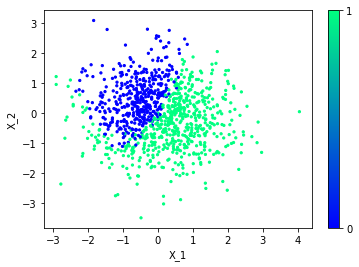

In [7]:
data = np.loadtxt('datosT3_.txt', delimiter=',')
x_input = np.array((data[0], data[1])).T
labels = np.array(data[2])

clase = list(map(lambda x: x == 1, labels))

plt.scatter(x_input[:,0], x_input[:,1], s=5, c=clase, cmap='winter')
#plt.title(u"Conjunto de datos en R² segun su etiqueta")
plt.xlabel(u"X_1")
plt.ylabel(u"X_2")
plt.colorbar(ticks=[0, 1])
plt.savefig('labeled_data.pdf')

In [63]:
epsilon = 0.0000001

def cost_func(theta, x, y):    
    a_param = np.multiply(np.dot(x, theta), -1)
    sigmoid_res = np.reciprocal(np.add(np.exp(a_param), 1))
    
    cross_entropy_res = np.sum(
        np.add(
            np.multiply(
                y,
                np.log(sigmoid_res + epsilon)), 
            np.multiply(
                np.subtract(1, y), 
                np.log(np.subtract(1, sigmoid_res) + epsilon))))/1000    
    
    return cross_entropy_res
    
x_tilda = np.array((data[1], data[0], np.ones(len(labels)))).T
theta_1 = [0.1,-0.1,0.01]
cost_func(theta_1, x_tilda, labels)

opt.minimize(cost_func, theta_1, args=(x_tilda, labels), method='L-BFGS-B', tol=1e-9)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


      fun: -14.584754756255036
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([8.73967565e-05, 2.20090612e-04, 1.31983313e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 296
      nit: 25
   status: 0
  success: True
        x: array([ 369.82843086, -650.91522029,  -68.59906177])

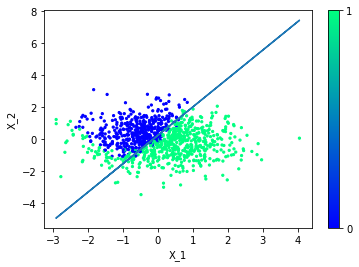

In [71]:
def rectaSepara(x, m2, m1, c):
    return -(m1*x + c)/m2

plt.scatter(x_input[:,0], x_input[:,1], s=5, c=clase, cmap='winter')
#plt.plot(x_input[:,0], rectaSepara(x_input[:,0], 6132.91882352, -11788.536494  ,  -1586.36667773))
#plt.plot(x_input[:,0], rectaSepara(x_input[:,0],  369.82843086, -650.91522029,  -68.59906177))
plt.plot(x_input[:,0], rectaSepara(x_input[:,0],  365.23347377, -649.19668062,  -85.2705916))
#plt.title(u"Separando los conjuntos: Regresion logistica")
plt.xlabel(u"X_1")
plt.ylabel(u"X_2")
plt.colorbar(ticks=[0, 1])
plt.savefig('regresion_logistica_1.pdf')

#True

### c)

In [68]:
# de la parte anterior obtenemos el punto inicial
#params_current = [6132, -11788  ,  -1586]
params_current = [0,0,0]
identity_3 = [[1, 0, 0],[0,1,0],[0,0,1]]

# proposal params
mean_proposal = [0,0,0]
sigma_proposal = 200
cov_proposal = np.multiply(identity_3, sigma_proposal)

# prior params
mu_prior = [369.82843086, -650.91522029,  -68.59906177]
sigma_prior = 1000


nIterations = 0
final_points = []

while(nIterations < 10000):
    # usamos proposal MVN
    params_proposal = np.add(params_current, np.random.multivariate_normal(mean_proposal, cov_proposal).T)

    # calculamos la verosimilitud
    likelihood_current = cost_func(params_current, x_tilda, labels)
    likelihood_proposal = cost_func(params_proposal, x_tilda, labels)

    prior_current = multivariate_normal(mu_prior, sigma_prior).pdf(params_current)
    prior_proposal = multivariate_normal(mu_prior, sigma_prior).pdf(params_proposal)

    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal

    p_accept = p_proposal / p_current

    accept = np.random.rand() < p_accept
    
    #pdb.set_trace()
    
    if accept:
        params_current = params_proposal
        if nIterations > 2500:
            final_points.append(params_current)
            if (len(final_points) > 999):
                print("Se alcanzo el largo maximo")
                break
    
    nIterations += 1


final_points
#pdb.set_trace()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Se alcanzo el largo maximo


[array([ 365.23347377, -649.19668062,  -85.2705916 ]),
 array([ 355.72407247, -665.323435  ,  -77.91738474]),
 array([ 341.34541986, -681.82758606,  -61.83055219]),
 array([ 343.85686807, -666.56203221,  -49.53921656]),
 array([ 358.80092422, -663.04623052,  -26.64249263]),
 array([ 340.33728966, -674.17560056,  -37.99286167]),
 array([ 343.22104183, -666.11432122,  -49.33981043]),
 array([ 360.06956292, -658.90945644,  -57.30303415]),
 array([ 352.5807279 , -667.05553703,  -46.61763655]),
 array([ 367.89069763, -700.26876489,  -46.8987596 ]),
 array([ 381.37624531, -700.87623716,  -39.62296089]),
 array([ 376.57999725, -689.00207874,  -38.77286255]),
 array([ 374.11777316, -660.8490913 ,  -26.53487117]),
 array([ 366.0070325 , -676.21111924,  -40.5269616 ]),
 array([ 347.03152667, -697.27063805,  -59.80069458]),
 array([ 368.50863093, -692.79184938,  -62.31458822]),
 array([ 357.79984131, -697.83215133,  -51.35076124]),
 array([ 365.64711062, -661.30538932,  -42.65948776]),
 array([ 3